Looking at data with Notebooks
============================

This is a Jupyter Notebook. You can use them for lots of things including

* Running Python code
* Displaying data
* Writing text like this
* Hiding all the code to quickly generate an interactive data documents which can be used by you, other Meteorologists, or customers

We're going to be using two Met Office Python modules

1. Iris, which lets you load and manipulate atmospheric data. See [here](http://scitools.org.uk/iris/) for more.
2. Cube Explorer which is brand new and lets you interact with the data using sliders etc. See [here](http://scitools.github.io/cube_browser/) for more.

WARNING: This is a crash course! Do not be frightened.

## Getting hold of some data

First off, lets get our imports sorted out.

In [ ]:
%matplotlib inline
import iris
import iris.coord_categorisation
import numpy as np

import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import cartopy.crs as ccrs

import cube_browser as cb

If you put a ! at the beginning of a cell, you can run Bash (Linux terminal) code. Lets use this to have a look at the data we've got in `/data/incoming`

In [2]:
!ls /data/incoming

era-interim-2mtemp-step-0-1979-1990.nc
era-interim-2mtemp-step-0-1990-2000.nc
era-interim-2mtemp-step-0-2000-2010.nc
era-interim-2mtemp-step-0-2010-latest.nc
era-interim-2mtemp-step-3-6-9-12-1979-1990.nc
era-interim-2mtemp-step-3-6-9-12-1990-2000.nc
era-interim-2mtemp-step-3-6-9-12-2000-2010.nc
era-interim-2mtemp-step-3-6-9-12-2010-latest.nc
era-interim-surface-pressure-1979-1990.nc
era-interim-surface-pressure-1990-2000.nc
era-interim-surface-pressure-2000-2010.nc
era-interim-surface-pressure-2010-latest.nc
era-interim-total-precip-1979-1990.nc
era-interim-total-precip-1990-2000.nc
era-interim-total-precip-2000-2010.nc
era-interim-total-precip-2010-latest.nc


Let's load all the temp data in using Iris. I happen to know that 'step-0' is 6 hourly data, so lets just use that.

In [3]:
def cb(c, f, n):
    c.attributes['history']=None
    
temp = iris.load('/data/incoming/era-interim-2mtemp-step-0-*.nc',
                         callback=cb).concatenate_cube()

/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [4]:
print temp

2 metre temperature / (K)           (time: 54420; latitude: 241; longitude: 480)
     Dimension coordinates:
          time                           x                -               -
          latitude                       -                x               -
          longitude                      -                -               x
     Attributes:
          Conventions: CF-1.6
          history: None


## Plotting some data

You can use Iris' quickplot module to make some...well..plots, quickly.

If you want to plot a map, you need a cube which is 2D lat/lon, so we'll take a slice

/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/ubuntu/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/ubuntu/miniconda2/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1339: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


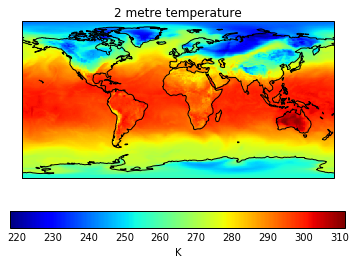

In [5]:
qplt.pcolormesh(temp[0])
plt.gca().coastlines()

#### A NOTE ON COLOURBARS
Please please please don't use the default rainbow colour scale. It's being phased out because it deforms the data. See [here](http://www.climate-lab-book.ac.uk/2016/why-rainbow-colour-scales-can-be-misleading/) for more. Compare how different rainbow (above) looks to the new better Viridis (below). What different (erroneous) conclusions, might you make from the top plot, that you would from the bottom?

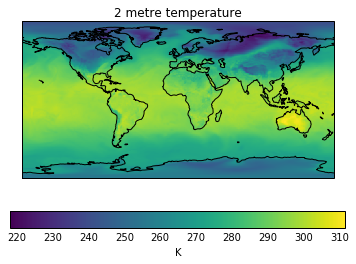

In [6]:
qplt.pcolormesh(temp[0], cmap='viridis')
plt.gca().coastlines()

## Interactive Temperature plots
Using `cube_browser` i.e. `cb` we can make a slider to look at different times. Again, you can read about this [here](http://scitools.github.io/cube_browser/)

In [9]:
import cube_browser as cb

In [14]:
uktemp = temp.intersection(latitude=(45.0, 75.0), longitude=(-50.0, 5.0))
ax = plt.subplot(111, projection=ccrs.NorthPolarStereo())
ax.coastlines()

plot = cb.Contourf(uktemp, ax, cmap='viridis')
cb.Browser([plot]).display()

## Histograms of values

In [92]:
iris.coord_categorisation.add_month(temp, "time")
print temp

2 metre temperature / (K)           (time: 54420; latitude: 241; longitude: 480)
     Dimension coordinates:
          time                           x                -               -
          latitude                       -                x               -
          longitude                      -                -               x
     Auxiliary coordinates:
          month                          x                -               -
     Attributes:
          Conventions: CF-1.6
          history: None


In [93]:
janCon = iris.Constraint(month="Jan")
jand = d.extract(janCon)

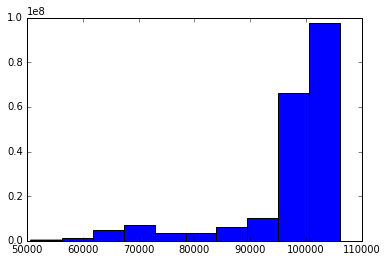

In [94]:
hist = plt.hist(jand.data.flatten())

/home/ubuntu/miniconda2/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1339: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


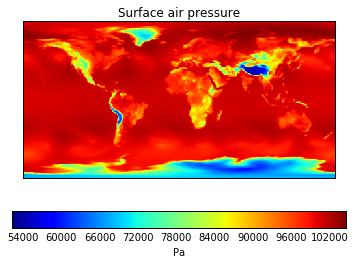

In [12]:
qplt.pcolormesh(d[0])